# Análise Exploratória - Calculadora de preços de aluguéis

# Conhecendo nosso DataSet

Importando bibliotecas

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import opendatasets as od

Carregando o DataSet

In [60]:
# Realiza o download do arquivo .csv contendo os dados que serão utilizados na análise e carrega o arquivo baixado num DataFrame
od.download("https://www.kaggle.com/datasets/argonalyst/sao-paulo-real-estate-sale-rent-april-2019")
file=('sao-paulo-real-estate-sale-rent-april-2019/sao-paulo-properties-april-2019.csv')
data = pd.read_csv(file)

Skipping, found downloaded files in ".\sao-paulo-real-estate-sale-rent-april-2019" (use force=True to force download)


In [61]:
# Dando uma olhada em nosso DataSet
data.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.525025,-46.482436


In [62]:
# Verificando as colunas do nosso DataSet
data.columns

Index(['Price', 'Condo', 'Size', 'Rooms', 'Toilets', 'Suites', 'Parking',
       'Elevator', 'Furnished', 'Swimming Pool', 'New', 'District',
       'Negotiation Type', 'Property Type', 'Latitude', 'Longitude'],
      dtype='object')

In [63]:
# Verificando os tipos de dados de cada coluna
data.dtypes

Price                 int64
Condo                 int64
Size                  int64
Rooms                 int64
Toilets               int64
Suites                int64
Parking               int64
Elevator              int64
Furnished             int64
Swimming Pool         int64
New                   int64
District             object
Negotiation Type     object
Property Type        object
Latitude            float64
Longitude           float64
dtype: object

In [64]:
# Podemos verificar que temos cerca de 13 mil linhas e 16 colunas. No decorrer da nossa análise algumas 
# linhas e colunas serão descartadas 
data.shape

(13640, 16)

In [65]:
# Obtendo informações um pouco mais detalhadas do nosso DataSet
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13640 entries, 0 to 13639
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             13640 non-null  int64  
 1   Condo             13640 non-null  int64  
 2   Size              13640 non-null  int64  
 3   Rooms             13640 non-null  int64  
 4   Toilets           13640 non-null  int64  
 5   Suites            13640 non-null  int64  
 6   Parking           13640 non-null  int64  
 7   Elevator          13640 non-null  int64  
 8   Furnished         13640 non-null  int64  
 9   Swimming Pool     13640 non-null  int64  
 10  New               13640 non-null  int64  
 11  District          13640 non-null  object 
 12  Negotiation Type  13640 non-null  object 
 13  Property Type     13640 non-null  object 
 14  Latitude          13640 non-null  float64
 15  Longitude         13640 non-null  float64
dtypes: float64(2), int64(11), object(3)
memo

In [66]:
data.describe()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,Latitude,Longitude
count,1.364000e+04,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.00000,13640.000000,13640.000000,13640.000000
mean,2.877378e+05,689.882331,84.373900,2.312023,2.073680,0.980792,1.393182,0.354179,0.146774,0.51217,0.015616,-22.077047,-43.597088
std,5.908214e+05,757.649363,58.435676,0.777461,0.961803,0.834891,0.829932,0.478281,0.353894,0.49987,0.123988,5.866633,11.487288
min,4.800000e+02,0.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-46.749039,-58.364352
25%,1.858750e+03,290.000000,50.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,-23.594552,-46.681671
50%,8.100000e+03,500.000000,65.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.00000,0.000000,-23.552813,-46.637255
75%,3.600000e+05,835.000000,94.000000,3.000000,2.000000,1.000000,2.000000,1.000000,0.000000,1.00000,0.000000,-23.517640,-46.560040
max,1.000000e+07,9500.000000,880.000000,10.000000,8.000000,6.000000,9.000000,1.000000,1.000000,1.00000,1.000000,0.000000,0.000000


# Preparando nosso DataSet

Algumas coisas terão que ser modificadas para que nossos objetivos sejam atendidos. Nossa primeira mudança será pegar apenas os imóveis disponíveis para aluguel.

In [67]:
data = data[(data["Negotiation Type"] == 'rent')]
data.shape

(7228, 16)

O número de linhas disponíveis para análise diminuiu para cerca de 7 mil.

In [68]:
# Removendo o nome da cidade da coluna District
for index, row in data.iterrows():
    data.at[index, 'District'] = row['District'].split("/")[0]
    
data["District"].unique()

array(['Artur Alvim', 'Belém', 'Cangaíba', 'Carrão', 'Cidade Líder',
       'Cidade Tiradentes', 'Ermelino Matarazzo', 'Iguatemi',
       'Itaim Paulista', 'Itaquera', 'Jardim Helena', 'José Bonifácio',
       'Lajeado', 'Parque do Carmo', 'Penha', 'Ponte Rasa', 'Sapopemba',
       'São Lucas', 'São Mateus', 'São Miguel', 'São Rafael', 'Tatuapé',
       'Vila Curuçá', 'Vila Formosa', 'Vila Jacuí', 'Vila Matilde',
       'Vila Prudente', 'Cambuci', 'Campo Belo', 'Campo Grande',
       'Campo Limpo', 'Capão Redondo', 'Cidade Ademar', 'Cidade Dutra',
       'Cursino', 'Grajaú', 'Ipiranga', 'Itaim Bibi', 'Jabaquara',
       'Jardim Ângela', 'Jardim Paulista', 'Moema', 'Morumbi', 'Pedreira',
       'Sacomã', 'Santo Amaro', 'Saúde', 'Socorro', 'Vila Andrade',
       'Vila Mariana', 'Vila Sônia', 'Alto de Pinheiros', 'Anhanguera',
       'Brasilândia', 'Butantã', 'Cachoeirinha', 'Freguesia do Ó',
       'Jaguaré', 'Jaraguá', 'Lapa', 'Limão', 'Perdizes', 'Pinheiros',
       'Pirituba', 'Raposo

In [69]:
data["Property Type"].unique() # Todos os registros são de apartamentos

array(['apartment'], dtype=object)

In [70]:
# Remove as colunas Latitude e Longitude porque são desnecessárias
data = data.drop("Latitude", 1)
data = data.drop("Longitude", 1)

# Removemos a coluna Property Type porque sabemos que todos os registros são de apartamentos
data = data.drop("Property Type", 1)

# Removemos a coluna Negotiation Type porque todos os registros são de alugel
data = data.drop("Negotiation Type", 1)

data.head()

C:\Users\Julio Murta\AppData\Local\Temp\ipykernel_9224\2691337143.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data = data.drop("Latitude", 1)
C:\Users\Julio Murta\AppData\Local\Temp\ipykernel_9224\2691337143.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data = data.drop("Longitude", 1)
C:\Users\Julio Murta\AppData\Local\Temp\ipykernel_9224\2691337143.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data = data.drop("Property Type", 1)
C:\Users\Julio Murta\AppData\Local\Temp\ipykernel_9224\2691337143.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data = data.drop("Negotiation Type", 1)


,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim


In [71]:
data["Elevator"].unique()

array([0, 1], dtype=int64)

In [72]:
data["Furnished"].unique()

array([0, 1], dtype=int64)

In [73]:
data["Swimming Pool"].unique()

array([0, 1], dtype=int64)

In [74]:
data["New"].unique()

array([0, 1], dtype=int64)

Com a chamada do método unique() para as colunas Elevator, Furnished, Swimming Pool e New podemos verificar que temos apenas dois valores (zero ou um). Para facilitar a manipulação do dados converteremos essa informação para o tipo booleano.

In [75]:
# Converte para booleano
hasElevator = data["Elevator"] == 1
isFurnished = data["Furnished"] == 1
hasSwimmingPool = data["Swimming Pool"] == 1
isNew = data["New"] == 1

# Insere as novas colunas
data = data.assign(HasElevator=hasElevator)
data = data.assign(IsFurnished=isFurnished)
data = data.assign(HasSwimmingPool=hasSwimmingPool)
data = data.assign(IsNew=isNew)

# Remove as colunas anteriores
data = data.drop("Elevator", 1)
data = data.drop("Furnished", 1)
data = data.drop("Swimming Pool", 1)
data = data.drop("New", 1)

data.head()

C:\Users\Julio Murta\AppData\Local\Temp\ipykernel_9224\672146165.py:14: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data = data.drop("Elevator", 1)
C:\Users\Julio Murta\AppData\Local\Temp\ipykernel_9224\672146165.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data = data.drop("Furnished", 1)
C:\Users\Julio Murta\AppData\Local\Temp\ipykernel_9224\672146165.py:16: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data = data.drop("Swimming Pool", 1)
C:\Users\Julio Murta\AppData\Local\Temp\ipykernel_9224\672146165.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data = data.drop("New", 1)


,Price,Condo,Size,Rooms,Toilets,Suites,Parking,District,HasElevator,IsFurnished,HasSwimmingPool,IsNew
0,930,220,47,2,2,1,1,Artur Alvim,False,False,False,False
1,1000,148,45,2,2,1,1,Artur Alvim,False,False,False,False
2,1000,100,48,2,2,1,1,Artur Alvim,False,False,False,False
3,1000,200,48,2,2,1,1,Artur Alvim,False,False,False,False
4,1300,410,55,2,2,1,1,Artur Alvim,True,False,False,False


# Plotando gráficos

# Coluna Price

In [76]:
data["Price"].describe()

count     7228.000000
mean      3077.669065
std       3522.830284
min        480.000000
25%       1350.000000
50%       2000.000000
75%       3300.000000
max      50000.000000
Name: Price, dtype: float64

<Axes: >

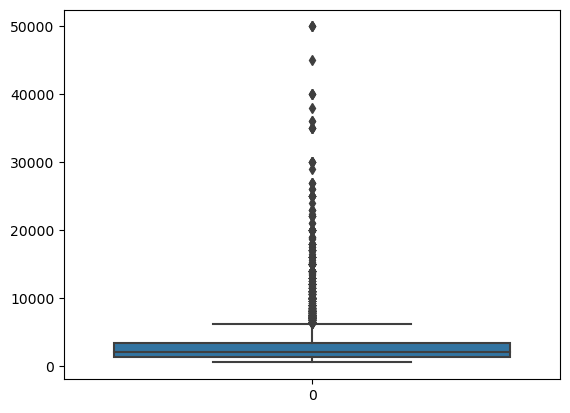

In [77]:
sns.boxplot(data["Price"])

No histograma abaixo podemos verificar que a maior parte dos nossos imóveis custam até 10 mil reais por mês

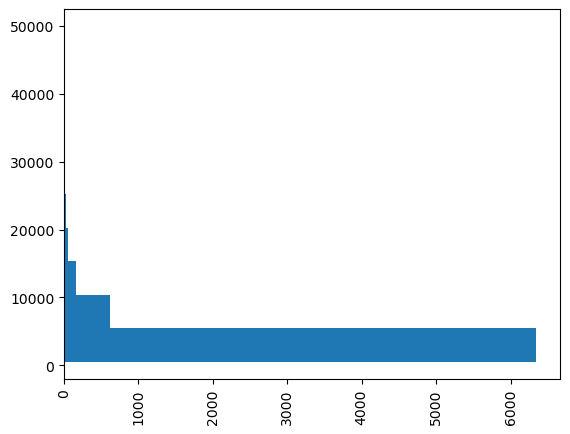

In [83]:
p = plt.hist(data["Price"], orientation='horizontal')
plt.xticks(rotation='vertical')

plt.show()

# Preço x Distrito

<Axes: xlabel='District', ylabel='Price'>

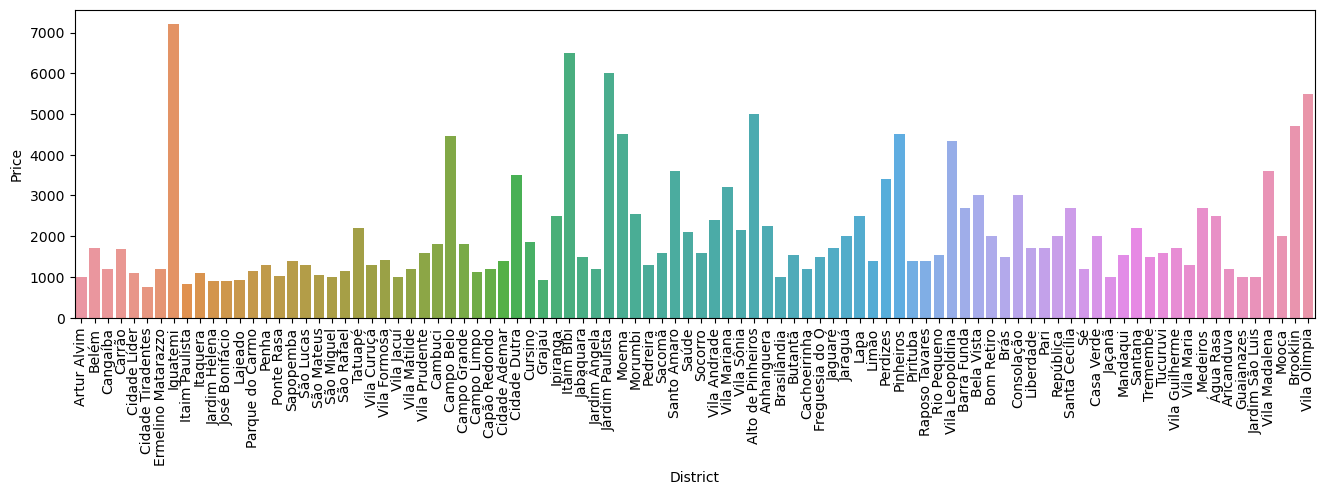

In [100]:
plt.figure(figsize=(16,4))
plt.xticks(rotation='vertical')
sns.barplot(x = data["District"], y = data["Price"], errorbar=('ci', False), estimator= np.median)

# Quantidade de quartos x Preço

<Axes: xlabel='Rooms', ylabel='Price'>

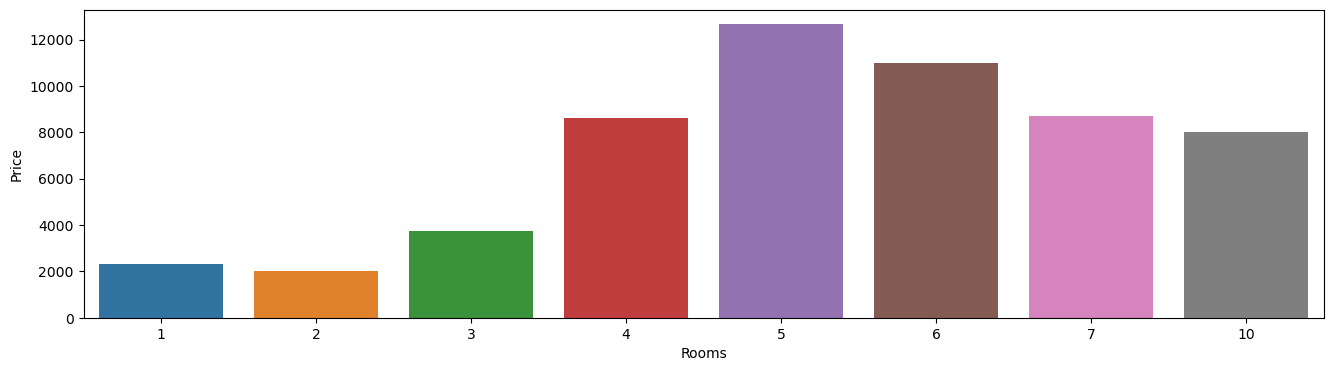

In [114]:
plt.figure(figsize=(16,4))
sns.barplot(x = data["Rooms"], y = data["Price"], errorbar=('ci', False))

# Quantidade de suítes x Preço

<Axes: xlabel='Suites', ylabel='Price'>

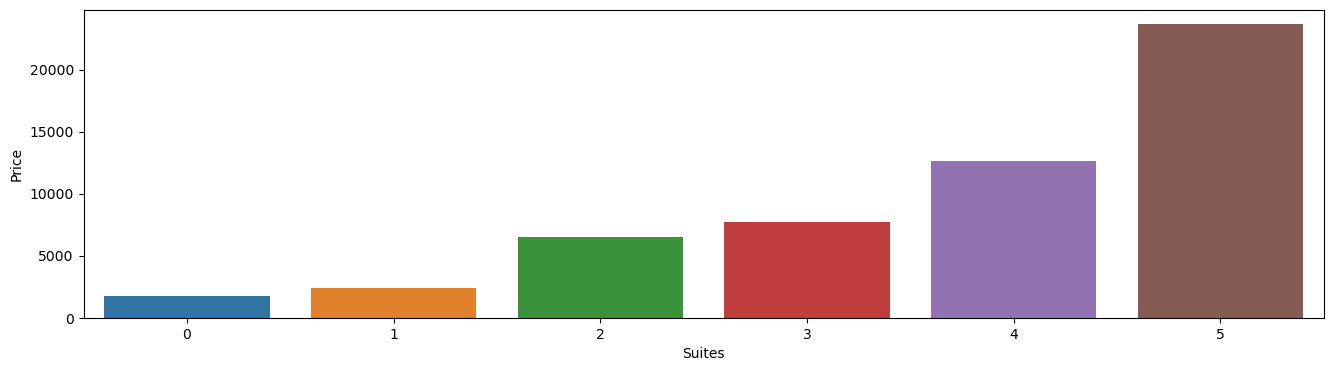

In [115]:
plt.figure(figsize=(16,4))
sns.barplot(x = data["Suites"], y = data["Price"], errorbar=('ci', False))

# Quantidade de vagas de estacionamento x Preço

<Axes: xlabel='Parking', ylabel='Price'>

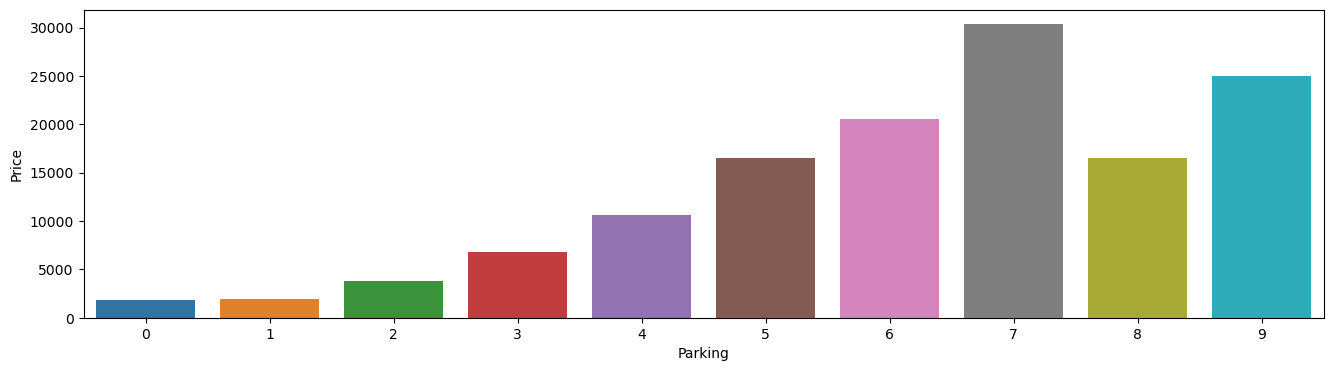

In [116]:
plt.figure(figsize=(16,4))
sns.barplot(x = data["Parking"], y = data["Price"], errorbar=('ci', False))

# Quantidade de banheiros x Preço

<Axes: xlabel='Toilets', ylabel='Price'>

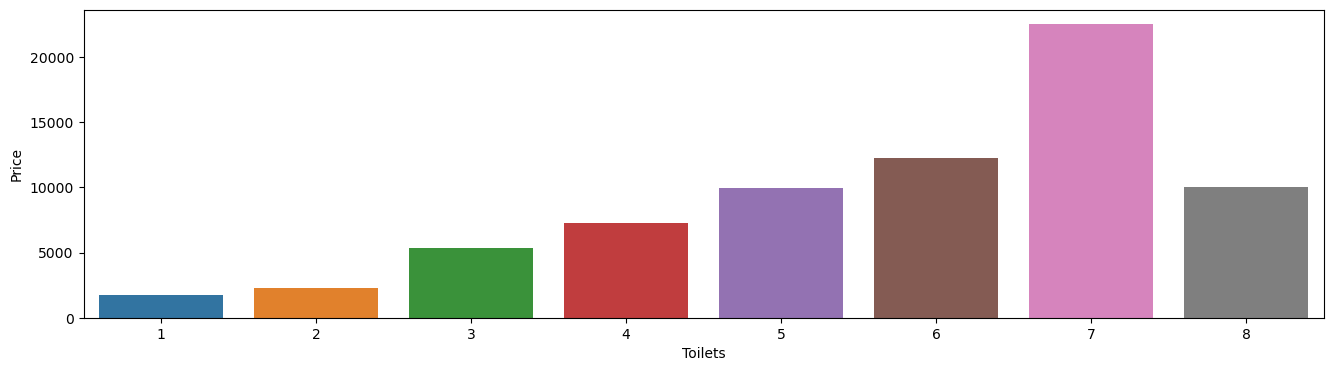

In [117]:
plt.figure(figsize=(16,4))
sns.barplot(x = data["Toilets"], y = data["Price"], errorbar=('ci', False))

# Gráfico de dispersão: tamanho do imóvel x Preço

<Axes: xlabel='Size', ylabel='Price'>

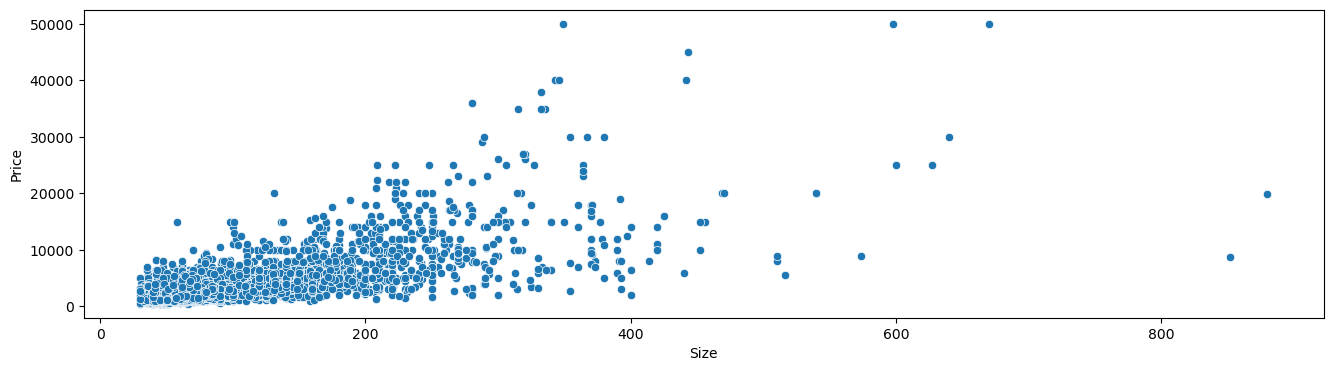

In [122]:
plt.figure(figsize=(16,4))
sns.scatterplot(data=data, x="Size", y="Price")

# Heatmap

C:\Users\Julio Murta\AppData\Local\Temp\ipykernel_9224\4264530730.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_correlation = data.corr(method = 'pearson')


<Axes: >

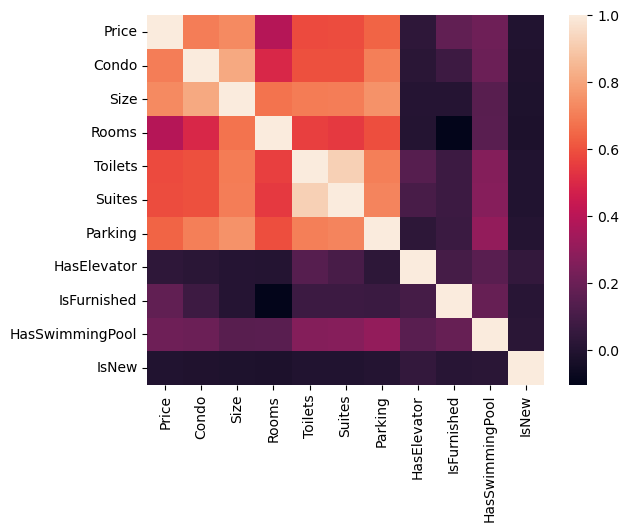

In [123]:
data_correlation = data.corr(method = 'pearson')
sns.heatmap(data_correlation)